In [5]:
# importing the pytorch library
import torch 
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torch.optim as optim

# importing the torchvision library
import torchvision
import torchvision.transforms as transforms

# importing the matplotlib library
import matplotlib.pyplot as plt
import numpy as np
# defining the device
#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [6]:
# Load the CIFAR100 dataset
trainset = datasets.CIFAR100(root='./data', train=True, download=True, transform=transforms.ToTensor())
testset = datasets.CIFAR100(root='./data', train=False, download=True, transform=transforms.ToTensor())

# Create the dataloaders
trainloader = DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)
testloader = DataLoader(testset, batch_size=64, shuffle=False, num_workers=2)


Files already downloaded and verified
Files already downloaded and verified


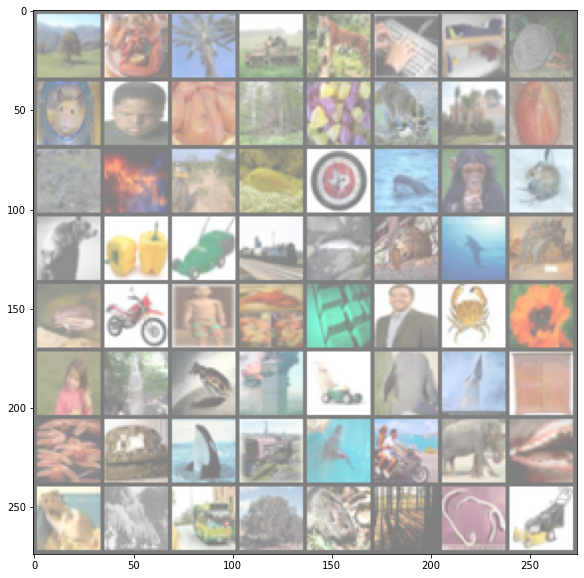

  oak_tree    lobster  palm_tree       tank      tiger   keyboard        bed  porcupine    hamster        boy


In [7]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    fig = plt.figure(figsize=(10, 10))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images, padding=2))

# print labels
print(' '.join('%10s' % trainset.classes[labels[j]] for j in range(10)))

## Modelling

In [8]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Define the first convolutional layer
        self.conv1 = nn.Conv2d(3, 6, 5)
        # Define the pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        # Define the second convolutional layer
        self.conv2 = nn.Conv2d(6, 16, 5)
        # Define the first fully connected layer
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        # Define the second fully connected layer
        self.fc2 = nn.Linear(120, 84)
        # Define the output layer with 100 neurons for CIFAR100
        self.fc3 = nn.Linear(84, 100)

    def forward(self, x):
        # Apply the first convolutional layer
        x = self.pool(F.relu(self.conv1(x)))
        # Apply the second convolutional layer
        x = self.pool(F.relu(self.conv2(x)))
        # Flatten the output tensor
        x = x.view(-1, 16 * 5 * 5)
        # Apply the first fully connected layer
        x = F.relu(self.fc1(x))
        # Apply the second fully connected layer
        x = F.relu(self.fc2(x))
        # Apply the output layer
        x = self.fc3(x)
        return x

In [9]:
# initialize the network
net = Net()

criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

optimizer = optim.Adam(net.parameters(), lr=0.001)

In [16]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

Finished Training


In [ ]:
for i, data in enumerate(trainloader, 0):
    # get the inputs
    inputs, labels = data

    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    outputs = myNet(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    # print statistics
    running_loss += loss.item()
    print(i)
    if i % 2000 == 1999:    # print every 2000 mini-batches
        print('[%d, %5d] loss: %.3f' %
              (epoch + 1, i + 1, running_loss / 2000))
        running_loss = 0.0


In [40]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = Net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 1 %


In [42]:
from sklearn.metrics import f1_score

In [43]:
def scoring_net_by_F1Score(net, testloader):
    # Initialize lists
    y_pred_list = []
    y_true_list = []

    # Set model to evaluation mode
    net.eval()

    # Iterate over test data
    for images, labels in testloader:
        # Forward pass
        outputs = net(images)
        # Get predictions from the maximum value
        _, predicted = torch.max(outputs.data, 1)
        # Append predictions
        y_pred_list.append(predicted)
        # Append ground truths
        y_true_list.append(labels)

    # Convert lists to tensors
    y_pred_list = torch.cat(y_pred_list).cpu().numpy()
    y_true_list = torch.cat(y_true_list).cpu().numpy()

    # Calculate F1 score
    return f1_score(y_true_list, y_pred_list, average='macro')

In [45]:
train_f1 = scoring_net_by_F1Score(Net, trainloader)
train_f1

0.0013204419629044943

In [ ]:
test_f1_score = scoring_net_by_F1Score(Net, testloader)
test_f1_score